In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# 在console内直接生成图像
%matplotlib inline 

In [2]:
data, target = load_iris(return_X_y=True, as_frame=True)
column = np.array(data.columns)

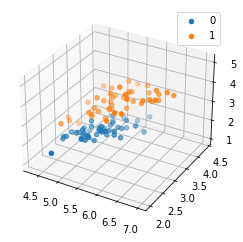

In [3]:
ax = plt.axes(projection='3d')
ax.scatter3D(data[:50][column[0]], data[:50][column[1]], data[:50][column[2]],label='0')
ax.scatter3D(data[50:100][column[0]], data[50:100][column[1]], data[50:100][column[2]],label='1')
# ax.xlabel(column[0])
# ax.ylabel(column[1])
# ax.zlabel(column[2])

ax.legend()

In [4]:
data = data.values
for i in range(data.shape[0]):
    if target[i] == 0:
        target[i] = -1

In [5]:
class Model:
    def __init__(self, l_rate):
        self.l_rate = l_rate
        self.w = 1 + np.zeros(3)
        self.b = 0
        
    def sign(self, x, w, b):
        return np.dot(x, w) + b
    
    def GD(self, x, y):
        end = False
        tot = x.shape[0]
        
        while end == False: 
            wrongcount = 0
            for i in range(tot):
                if y[i] * self.sign(x[i], self.w, self.b) <= 0:
                    wrongcount = wrongcount + 1
                    self.w = self.w + self.l_rate * x[i] * y[i]
#                     print(x[i] * y[i])
                    self.b = self.b + self.l_rate * y[i]
            if wrongcount == 0:
                end = True
#             print(wrongcount)
        return "Gradient Descent Done !!!"
    
    def loss(self):
        pass
        

In [6]:
model = Model(0.1)
model.GD(data[0:100, 0:3], target[0:100])

'Gradient Descent Done !!!'

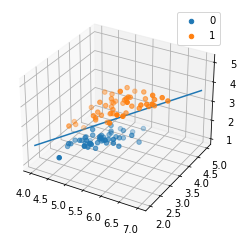

In [7]:
x_points = np.linspace(4, 7, 50)
y_points = np.linspace(2, 5, 50)
z_ = -(model.w[0] * x_points + model.w[1] * y_points + model.b) / model.w[2]
ax = plt.axes(projection='3d')
ax.plot(x_points, y_points, z_)
ax.scatter3D(data[:50][:,0], data[:50][:,1], data[:50][:,2],label='0')
ax.scatter3D(data[50:100][:,0], data[50:100][:,1], data[50:100][:,2],label='1')
ax.legend()